In this Notebook We will Discover how to evaluate a model on training data.
* We Will discover how to split data into test data, training data, cross-validation data
* Compares differnt models on higher degree polynomials features
* Will do Some feature Scaling to get more Accurate Results 

In [1]:
import  numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error



In [2]:
data =pd.read_csv(r'C:\Users\User\Desktop\Datascience\Machine_Learning_model_techniques\Model Evaluation & Selection\Regression\data\data_w3_ex1.csv')

In [ ]:
data


,1.651000000000000227e+03,4.326452172406379759e+02
0,1691.816327,454.935530
1,1732.632653,471.525248
2,1773.448980,482.506389
3,1814.265306,468.357886
4,1855.081633,482.152531
5,1895.897959,540.021756
6,1936.714286,534.584267
7,1977.530612,558.346208
8,2018.346939,566.423445
9,2059.163265,581.397651


In [4]:
x=data.iloc[:,0]
y=data.iloc[:,1]

In [5]:
print("X Dimmensions",x.shape)
print("Y Dimmensions",y.shape)

X=x.values.reshape(-1,1)
Y=y.values.reshape(-1,1)

print("After")
#.values → strips it down to NumPy

print("X Dimmensions",X.shape)
print("Y Dimmensions",Y.shape)

X Dimmensions (49,)
Y Dimmensions (49,)
After
X Dimmensions (49, 1)
Y Dimmensions (49, 1)


### Test Train Split
* ***training set*** - used to train the model
* ***cross validation set (also called validation, development, or dev set)*** - used to evaluate the different model configurations you are choosing from. For example, you can use this to make a decision on what polynomial features to add to your dataset.
* ***test set*** - used to give a fair estimate of your chosen model's performance against new examples. This should not be used to make decisions while you are still developing the models.

In [6]:
# Get 60% of the dataset as the training set. Put the remaining 40% in temporary variables: x_ and y_.
x_train, x_, y_train, y_ = train_test_split(X, Y, test_size=0.40, random_state=1)

# Split the 40% subset above into two: one half for cross validation and the other for the test set
x_cv, x_test, y_cv, y_test = train_test_split(x_, y_, test_size=0.50, random_state=1)

# Delete temporary variables
del x_, y_

print(f"the shape of the training set (input) is: {x_train.shape}")
print(f"the shape of the training set (target) is: {y_train.shape}\n")
print(f"the shape of the cross validation set (input) is: {x_cv.shape}")
print(f"the shape of the cross validation set (target) is: {y_cv.shape}\n")
print(f"the shape of the test set (input) is: {x_test.shape}")
print(f"the shape of the test set (target) is: {y_test.shape}")

the shape of the training set (input) is: (29, 1)
the shape of the training set (target) is: (29, 1)

the shape of the cross validation set (input) is: (10, 1)
the shape of the cross validation set (target) is: (10, 1)

the shape of the test set (input) is: (10, 1)
the shape of the test set (target) is: (10, 1)


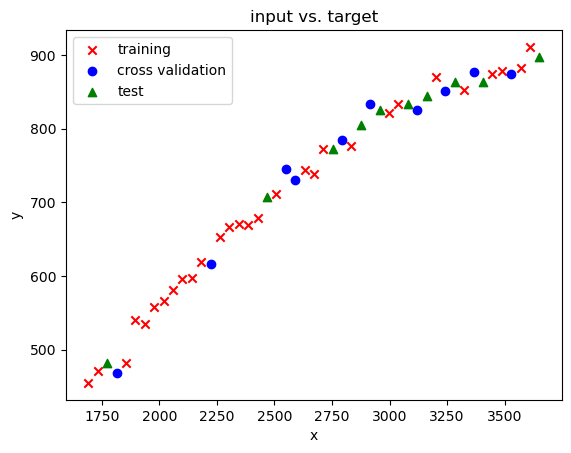

In [7]:
import functions
functions.plot_train_cv_test(x_train,y_train,x_cv,y_cv,x_test,y_test)

## Fit a linear model

Now that you have split the data, one of the first things you can try is to fit a linear model.

 ### Feature Scaling
 you saw that it is usually a good idea to perform feature scaling to help your model converge faster. This is especially true if your input features have widely different ranges of values. Later in this lab, you will be adding polynomial terms so your input features will indeed have different ranges. For example, $x$ runs from around 1600 to 3600, while $x^2$ will run from 2.56 million to 12.96 million. 

 This computes the z-score of your inputs. As a refresher, the z-score is given by the equation:

$$ z = \frac{x - \mu}{\sigma} $$

where $\mu$ is the mean of the feature values and $\sigma$ is the standard deviation.

In [8]:
Scaler=StandardScaler()

x_scaled_train=Scaler.fit_transform(x_train)

print(f"Mean of scaled input {Scaler.mean_.squeeze():.2f}")
print(f"Computed standard deviation of the training set: {Scaler.scale_.squeeze():.2f}")



Mean of scaled input 2529.25
Computed standard deviation of the training set: 578.48


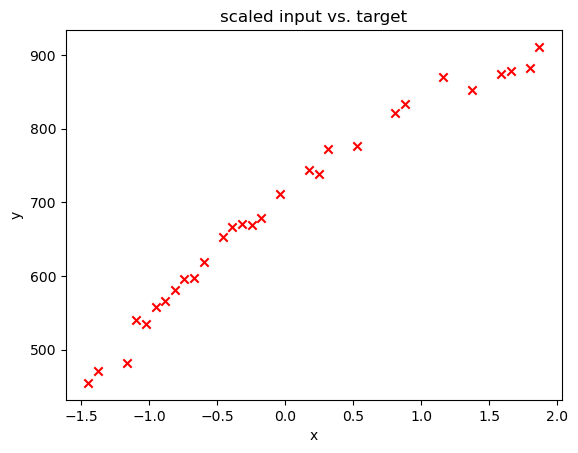

In [9]:
import sys
sys.modules.pop("functions", None) 
                 



from functions import plot_dataset
plot_dataset(x_scaled_train, y_train, title="scaled input vs. target")

# Training Model 




In [10]:
LinearModel= LinearRegression()
LinearModel.fit(x_scaled_train,y_train)

LinearRegression()

### Evaluate the Model

To evaluate the performance of your model, you will measure the error for the training and cross validation sets. For the training error, recall the equation for calculating the mean squared error (MSE):

$$J_{train}(\vec{w}, b) = \frac{1}{2m_{train}}\left[\sum_{i=1}^{m_{train}}(f_{\vec{w},b}(\vec{x}_{train}^{(i)}) - y_{train}^{(i)})^2\right]$$

Scikit-learn also has a built-in [`mean_squared_error()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) function that you can use. Take note though that [as per the documentation](https://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error), scikit-learn's implementation only divides by `m` and not `2*m`, where `m` is the number of examples. As mentioned in Course 1 of this Specialization (cost function lectures), dividing by `2m` is a convention we will follow but the calculations should still work whether or not you include it. Thus, to match the equation above, you can use the scikit-learn function then divide by 2 as shown below. We also included a for-loop implementation so you can check that it's equal. 

Another thing to take note: Since you trained the model on scaled values (i.e. using the z-score), you should also feed in the scaled training set instead of its raw values.

In [11]:
yhat=LinearModel.predict(x_scaled_train
                         )
print(f"MSE USING SK-LEARN : {mean_squared_error(yhat,y_train)/2}")

mse=0

for i in range (len(yhat)):
   square=(yhat[i]-y_train[i])**2
   mse=mse+square

mse=mse/(2*(len(yhat)))

print(f"MSE USING For loop : {mean_squared_error(yhat,y_train)/2}")



  


MSE USING SK-LEARN : 333.3853275949596
MSE USING For loop : 333.3853275949596


You can then compute the MSE for the cross validation set with basically the same equation:

$$J_{cv}(\vec{w}, b) = \frac{1}{2m_{cv}}\left[\sum_{i=1}^{m_{cv}}(f_{\vec{w},b}(\vec{x}_{cv}^{(i)}) - y_{cv}^{(i)})^2\right]$$

As with the training set, you will also want to scale the cross validation set. An *important* thing to note when using the z-score is you have to use the mean and standard deviation of the **training set** when scaling the cross validation set. This is to ensure that your input features are transformed as expected by the model. One way to gain intuition is with this scenario:

* Say that your training set has an input feature equal to `500` which is scaled down to `0.5` using the z-score.
* After training, your model is able to accurately map this scaled input `x=0.5` to the target output `y=300`. 
* Now let's say that you deployed this model and one of your users fed it a sample equal to `500`. 
* If you get this input sample's z-score using any other values of the mean and standard deviation, then it might not be scaled to `0.5` and your model will most likely make a wrong prediction (i.e. not equal to `y=300`). 

You will scale the cross validation set below by using the same `StandardScaler` you used earlier but only calling its [`transform()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler.transform) method instead of [`fit_transform()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler.fit_transform).

In [12]:

X_cv_scaled = Scaler.transform(x_cv)

print(f"Mean used to scale the CV set: {Scaler.mean_.squeeze():.2f}")
print(f"Standard deviation used to scale the CV set: {Scaler.scale_.squeeze():.2f}")


yhat = LinearModel.predict(X_cv_scaled)


print(f"Cross validation MSE: {mean_squared_error(y_cv, yhat) / 2}")

Mean used to scale the CV set: 2529.25
Standard deviation used to scale the CV set: 578.48
Cross validation MSE: 634.8120035263689


## Adding Polynomial Features

From the graphs earlier, you may have noticed that the target `y` rises more sharply at smaller values of `x` compared to higher ones. A straight line might not be the best choice because the target `y` seems to flatten out as `x` increases. Now that you have these values of the training and cross validation MSE from the linear model, you can try adding polynomial features to see if you can get a better performance. The code will mostly be the same but with a few extra preprocessing steps. Let's see that below.

In [13]:
poly =PolynomialFeatures(degree=2,include_bias=False)

x_mapped=poly.fit_transform(x_train)

print(x_mapped)

[[3.32446939e+03 1.10520967e+07]
 [2.38569388e+03 5.69153528e+06]
 [3.48773469e+03 1.21642933e+07]
 [2.67140816e+03 7.13642157e+06]
 [2.63059184e+03 6.92001341e+06]
 [1.85508163e+03 3.44132786e+06]
 [2.99793878e+03 8.98763690e+06]
 [2.26324490e+03 5.12227747e+06]
 [2.09997959e+03 4.40991429e+06]
 [2.83467347e+03 8.03537368e+06]
 [3.61018367e+03 1.30334262e+07]
 [3.03875510e+03 9.23403257e+06]
 [2.42651020e+03 5.88795177e+06]
 [2.50814286e+03 6.29078059e+06]
 [2.71222449e+03 7.35616168e+06]
 [1.93671429e+03 3.75086222e+06]
 [1.97753061e+03 3.91062732e+06]
 [3.56936735e+03 1.27403833e+07]
 [1.73263265e+03 3.00201591e+06]
 [2.34487755e+03 5.49845073e+06]
 [1.69181633e+03 2.86224248e+06]
 [2.30406122e+03 5.30869813e+06]
 [1.89589796e+03 3.59442907e+06]
 [2.14079592e+03 4.58300716e+06]
 [2.05916327e+03 4.24015335e+06]
 [2.01834694e+03 4.07372437e+06]
 [2.18161224e+03 4.75943199e+06]
 [3.44691837e+03 1.18812462e+07]
 [3.20202041e+03 1.02529347e+07]]


In [23]:
Scaler_poly=StandardScaler()

x_train_mapped_scaled=Scaler_poly.fit_transform(x_mapped)

print(x_train_mapped_scaled)

[[ 1.37465111  1.39477385]
 [-0.2481671  -0.33583093]
 [ 1.65688036  1.75383563]
 [ 0.24573409  0.13063646]
 [ 0.17517678  0.0607712 ]
 [-1.16541218 -1.06228837]
 [ 0.8101926   0.72828321]
 [-0.45983904 -0.51961025]
 [-0.7420683  -0.74958973]
 [ 0.52796335  0.42085435]
 [ 1.8685523   2.03442666]
 [ 0.88074991  0.80782964]
 [-0.17760979 -0.27241979]
 [-0.03649516 -0.14237045]
 [ 0.31629141  0.2015774 ]
 [-1.02429755 -0.96235823]
 [-0.95374024 -0.91077963]
 [ 1.79799499  1.93982063]
 [-1.37708412 -1.20411593]
 [-0.31872442 -0.39816639]
 [-1.44764143 -1.24924042]
 [-0.38928173 -0.45942616]
 [-1.09485486 -1.01286114]
 [-0.67151098 -0.69370838]
 [-0.81262561 -0.80439538]
 [-0.88318292 -0.85812535]
 [-0.60095367 -0.63675136]
 [ 1.58632305  1.66245665]
 [ 1.16297917  1.13677221]]


In [24]:
model=LinearRegression()

model.fit(x_train_mapped_scaled,y_train)

yhat=model.predict(x_train_mapped_scaled)

mse=mean_squared_error(yhat,y_train)/2

print(f"Mean Squared Error on X_Mapped_scaled:{mse}")

x_cv_mapped=poly.transform(x_cv)
x_cv_scaled_mapped=Scaler_poly.transform(x_cv_mapped)

yhat=model.predict(x_cv_scaled_mapped)
print(f"mean squared error on x_cv data : {(mean_squared_error(yhat,y_cv))/2}" )





Mean Squared Error on X_Mapped_scaled:54.6672736050954
mean squared error on x_cv data : 147.22989141367302


You can create a loop that contains all the steps in the previous code cells. Here is one implementation that adds polynomial features up to degree=10. We'll plot it at the end to make it easier to compare the results for each model.

In [28]:
train_mses=[]
cv_mses=[]
models=[]
scalers=[]
pol=[]

for degree in range (1,11):
    poly=PolynomialFeatures(degree,include_bias=False)
    x_train_mapped=poly.fit_transform(x_train)
    pol.append(poly)

    Scaler=StandardScaler()
    x_tarin_scaled=Scaler.fit_transform(x_train_mapped)
    scalers.append(Scaler)
   
    model=LinearRegression()
    model.fit(x_tarin_scaled,y_train)
    models.append(model)
    yhat=model.predict(x_tarin_scaled)
    train_mses.append(mean_squared_error(yhat,y_train)/2)

    x_cv_map=poly.transform(x_cv)
    x_cv_scaled_map=Scaler.transform(x_cv_map)

    yhat=model.predict(x_cv_scaled_map)
    cv_mses.append(mean_squared_error(yhat,y_cv)/2)


In [30]:
degree=range(1,11)
import matplotlib.pyplot as plt
def plot_train_cv_mses(degrees, train_mses, cv_mses, title):
    degrees = range(1,11)
    plt.plot(degrees, train_mses, marker='o', c='r', label='training MSEs'); 
    plt.plot(degrees, cv_mses, marker='o', c='b', label='CV MSEs'); 
    plt.title(title)
    plt.xlabel("degree"); 
    plt.ylabel("MSE"); 
    plt.legend()
    plt.show()

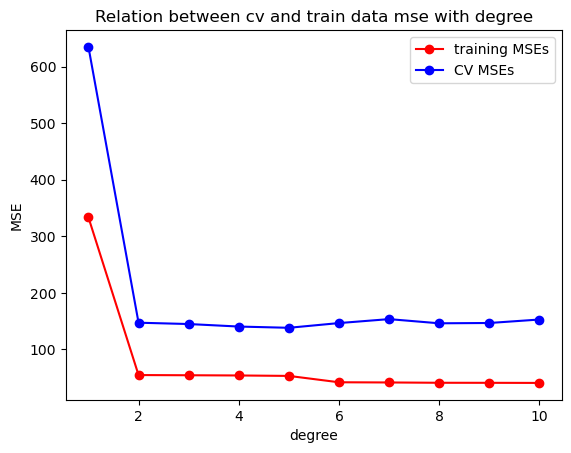

In [31]:
plot_train_cv_mses(degree,train_mses,cv_mses,"Relation between cv and train data mse with degree")

### Choosing the best model

When selecting a model, you want to choose one that performs well both on the training and cross validation set. It implies that it is able to learn the patterns from your training set without overfitting. If you used the defaults in this lab, you will notice a sharp drop in cross validation error from the models with degree=1 to degree=2. This is followed by a relatively flat line up to degree=5. After that, however, the cross validation error is generally getting worse as you add more polynomial features. Given these, you can decide to use the model with the lowest `cv_mse` as the one best suited for your application.

In [34]:

degree = np.argmin(cv_mses) + 1
print(f"Lowest CV MSE is found in the model with degree={degree}")

Lowest CV MSE is found in the model with degree=5


In [36]:
x_test_mapped=pol[degree-1].transform(x_test)

x_test_mapped_scaled=scalers[degree-1].transform(x_test_mapped)

yhat=models[degree-1].predict(x_test_mapped_scaled)



print(f"Training MSE: {train_mses[degree-1]}")
print(f"CV MSE :{cv_mses[degree-1]}")
print(f"X_test MSE: {mean_squared_error(yhat,y_test)/2}")


Training MSE: 53.16868421516985
CV MSE :138.23039725859863
X_test MSE: 21.362012012108973
